In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import warnings 
import matplotlib.pyplot as plt 
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('dataset/in-vehicle-coupon-recommendation.csv')
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
df.shape

(12684, 26)

In [5]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [6]:
for feature in df.columns:
    if df[feature].isnull().sum() > 0:
        print("In {}, mean of null value is : {}".format(feature, (df[feature].isnull().sum() / len(df)) * 100 ))

In car, mean of null value is : 99.14853358561967
In Bar, mean of null value is : 0.8435824660990224
In CoffeeHouse, mean of null value is : 1.7108167770419427
In CarryAway, mean of null value is : 1.1904761904761905
In RestaurantLessThan20, mean of null value is : 1.0249132765689057
In Restaurant20To50, mean of null value is : 1.490066225165563


In [7]:
df.drop(['car'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [14]:
label_enc = LabelEncoder()
df['destination'] = label_enc.fit_transform(df['destination'])
df['passanger'] = label_enc.fit_transform(df['passanger'])
df['weather'] = label_enc.fit_transform(df['weather'])
df['time'] = label_enc.fit_transform(df['time'])
df['coupon'] = label_enc.fit_transform(df['coupon'])
df['expiration'] = label_enc.fit_transform(df['expiration'])
df['gender'] = label_enc.fit_transform(df['gender'])
df['maritalStatus'] = label_enc.fit_transform(df['maritalStatus'])
df['education'] = label_enc.fit_transform(df['education'])
df['occupation'] = label_enc.fit_transform(df['occupation'])
df['income'] = label_enc.fit_transform(df['income'])

In [15]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,2,4,0,0,21,3,1,5,24,3,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,1,1,2,80,0,2,1,0,21,3,1,5,24,3,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,1,1,2,80,0,1,1,0,21,3,1,5,24,3,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,1,1,2,80,2,2,1,0,21,3,1,5,24,3,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,1,1,2,80,2,2,0,0,21,3,1,5,24,3,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [16]:
df.corr()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,maritalStatus,has_children,education,occupation,income,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
destination,1.000000,-0.117811,-0.078305,-0.027633,0.411437,-0.011468,-0.032594,0.006779,0.003036,-0.006707,0.008793,-0.007463,-0.014554,NaN,0.140684,0.197240,-0.083328,0.083328,-0.001906
passanger,-0.117811,1.000000,0.059821,0.056127,-0.400690,0.018767,0.074764,-0.020896,-0.021376,0.034542,0.000934,-0.060400,-0.002329,NaN,0.064544,-0.197595,-0.268830,0.268830,0.051614
weather,-0.078305,0.059821,1.000000,0.434497,-0.023316,0.147008,0.017702,-0.027003,-0.016816,0.012657,0.012733,-0.006855,-0.032758,NaN,-0.121698,-0.202572,0.017712,-0.017712,0.098800
temperature,-0.027633,0.056127,0.434497,1.000000,-0.059041,0.128771,0.124090,-0.025504,0.003585,-0.019716,0.015460,0.006536,-0.025091,NaN,-0.155332,-0.216254,0.097085,-0.097085,0.061240
time,0.411437,-0.400690,-0.023316,-0.059041,1.000000,0.047612,-0.084691,-0.003507,0.004826,-0.007256,-0.003009,0.012835,-0.006210,NaN,0.007218,0.292231,0.311467,-0.311467,-0.047377
coupon,-0.011468,0.018767,0.147008,0.128771,0.047612,1.000000,0.148383,0.007134,-0.000132,-0.010422,-0.000724,-0.002216,0.000871,NaN,-0.131571,-0.112780,-0.073007,0.073007,0.097019
expiration,-0.032594,0.074764,0.017702,0.124090,-0.084691,0.148383,1.000000,-0.001264,-0.012328,0.016020,-0.009198,-0.018288,-0.011180,NaN,0.042740,-0.032977,0.033584,-0.033584,-0.129920
gender,0.006779,-0.020896,-0.027003,-0.025504,-0.003507,0.007134,-0.001264,1.000000,0.057552,-0.159956,0.015029,-0.014758,0.026677,NaN,-0.007028,0.002743,-0.004496,0.004496,0.043969
maritalStatus,0.003036,-0.021376,-0.016816,0.003585,0.004826,-0.000132,-0.012328,0.057552,1.000000,-0.433628,0.068872,0.142972,0.073555,NaN,-0.049471,0.004997,0.016504,-0.016504,0.025083
has_children,-0.006707,0.034542,0.012657,-0.019716,-0.007256,-0.010422,0.016020,-0.159956,-0.433628,1.000000,-0.055373,-0.112461,-0.000569,NaN,0.078211,-0.013722,-0.031620,0.031620,-0.045557


In [17]:
''' converting 50plus and below21 values into 51 and 20'''
df['age'] = np.where(df['age'] == '50plus', '51', df['age'])
df['age'] = np.where(df['age'] == 'below21', '20', df['age'])

In [18]:
df.Y.value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [23]:
X = df[['destination', 'passanger', 'weather', 'time', 'coupon', 'expiration','gender', 'maritalStatus', 'education',
            'occupation', 'income']]
y = df.iloc[:, -1]

In [24]:
def result(X, y, ts, rs, model, pca=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=rs)    
    if pca == True:
        pca = PCA(n_components=8)
        X_train = pca.fit_transform(X_train)
        X_test = pca.transform(X_test)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    ''' performance of model '''
    print("Classification Report: \n", classification_report(y_test, pred))
    print("-" * 100)
    print()    
    print("Accuracy Score: ", accuracy_score(y_test, pred))
    print("-" * 100)
    print()
    print("Confusion Matrix: ")
    plt.figure(figsize=(10, 5))
    sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='g');
    plt.title('Confusion Matrix', fontsize=20)

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.38      0.46      1405
           1       0.62      0.80      0.69      1766

    accuracy                           0.61      3171
   macro avg       0.60      0.59      0.58      3171
weighted avg       0.61      0.61      0.59      3171

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6095868811100599
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


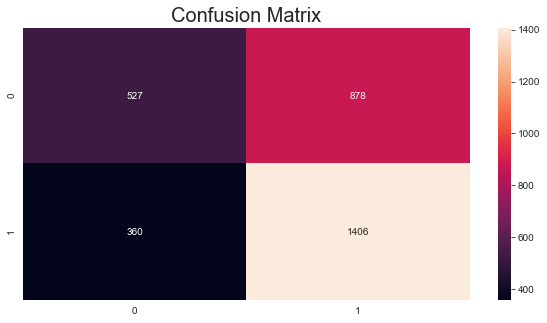

In [25]:
lg = LogisticRegression()
result(X, y, 0.25, 0, lg)

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.58      0.61      1405
           1       0.69      0.76      0.72      1766

    accuracy                           0.68      3171
   macro avg       0.67      0.67      0.67      3171
weighted avg       0.68      0.68      0.67      3171

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6770734783979817
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


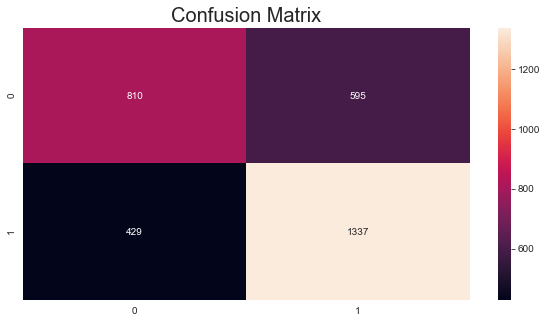

In [26]:
rf = RandomForestClassifier()
result(X, y, 0.25, 0, rf)

Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.34      0.43      1387
           1       0.62      0.83      0.71      1784

    accuracy                           0.61      3171
   macro avg       0.61      0.58      0.57      3171
weighted avg       0.61      0.61      0.59      3171

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6121097445600757
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


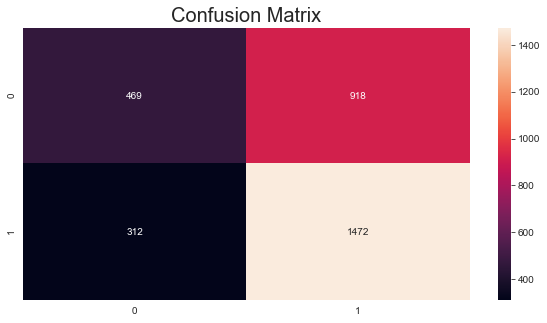

In [27]:
nv = GaussianNB()
result(X, y, 0.25, 42, nv)

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.50      0.54      1405
           1       0.64      0.71      0.68      1766

    accuracy                           0.62      3171
   macro avg       0.61      0.61      0.61      3171
weighted avg       0.61      0.62      0.61      3171

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6181015452538632
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


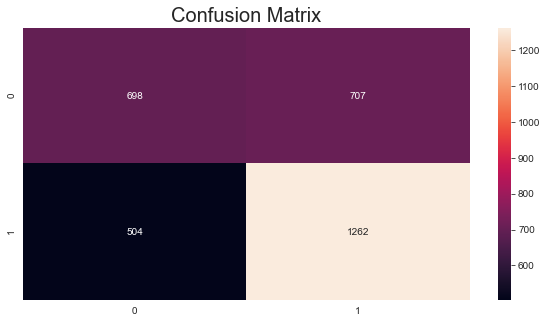

In [28]:
knn = KNeighborsClassifier()
result(X, y, 0.25, 0, knn)

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.44      0.53      1405
           1       0.65      0.81      0.72      1766

    accuracy                           0.65      3171
   macro avg       0.65      0.63      0.62      3171
weighted avg       0.65      0.65      0.63      3171

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6467991169977925
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


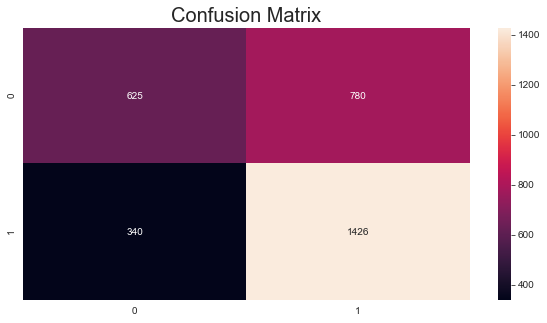

In [29]:
svc = SVC()
result(X, y, 0.25, 0, svc)

Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.58      0.61      1405
           1       0.69      0.76      0.72      1766

    accuracy                           0.68      3171
   macro avg       0.67      0.67      0.67      3171
weighted avg       0.67      0.68      0.67      3171

----------------------------------------------------------------------------------------------------

Accuracy Score:  0.6764427625354777
----------------------------------------------------------------------------------------------------

Confusion Matrix: 


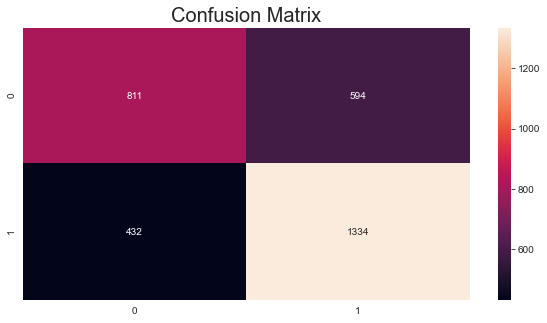

In [30]:
rf = RandomForestClassifier()
result(X, y, 0.25, 0, rf, pca=True)